In [1]:
from openbb import obb
import pandas as pd

ModuleNotFoundError: No module named 'openbb'

In [ ]:
df_daily = obb.equity.price.historical(
    symbol="spy", start_date="1990-01-01", provider="yfinance", adjusted=True
).to_df()
df_daily.head(10)

/Users/erik/opt/anaconda3/envs/finance/lib/python3.11/site-packages/openbb_yfinance/models/equity_historical.py:91: UserWarning: The 'adjusted' parameter is deprecated and will be removed in a future version.
  warn(


,open,high,low,close,volume,split_ratio,dividend,capital_gains
date,,,,,,,,
1993-01-29,24.781355,24.781355,24.658065,24.763742,1003200,0.0,0.0,0.0
1993-02-01,24.781347,24.939863,24.781347,24.939863,480500,0.0,0.0,0.0
1993-02-02,24.922253,25.010317,24.869414,24.992704,201300,0.0,0.0,0.0
1993-02-03,25.027927,25.274508,25.010314,25.256895,529400,0.0,0.0,0.0
1993-02-04,25.344961,25.415412,25.063154,25.362574,531500,0.0,0.0,0.0
1993-02-05,25.344957,25.397796,25.204054,25.344957,492100,0.0,0.0,0.0
1993-02-08,25.344957,25.433022,25.309732,25.344957,596100,0.0,0.0,0.0
1993-02-09,25.256901,25.256901,25.115998,25.168837,122100,0.0,0.0,0.0
1993-02-10,25.168838,25.221676,25.098386,25.204063,379600,0.0,0.0,0.0


In [ ]:
import numpy as np
import pandas as pd
from datetime import datetime

import vectorbt as vbt

# Prepare data
start = '2019-01-01 UTC'  # crypto is in UTC
end = '2020-01-01 UTC'
btc_price = vbt.YFData.download('BTC-USD', start=start, end=end).get('Close')

btc_price

Date
2019-01-01 00:00:00+00:00    3843.520020
2019-01-02 00:00:00+00:00    3943.409424
2019-01-03 00:00:00+00:00    3836.741211
2019-01-04 00:00:00+00:00    3857.717529
2019-01-05 00:00:00+00:00    3845.194580
                                ...     
2019-12-27 00:00:00+00:00    7290.088379
2019-12-28 00:00:00+00:00    7317.990234
2019-12-29 00:00:00+00:00    7422.652832
2019-12-30 00:00:00+00:00    7292.995117
2019-12-31 00:00:00+00:00    7193.599121
Freq: D, Name: Close, Length: 365, dtype: float64

In [ ]:
fast_ma = vbt.MA.run(btc_price, 10, short_name='fast')
slow_ma = vbt.MA.run(btc_price, 20, short_name='slow')

In [ ]:
entries = fast_ma.ma_crossed_above(slow_ma)
entries

Date
2019-01-01 00:00:00+00:00    False
2019-01-02 00:00:00+00:00    False
2019-01-03 00:00:00+00:00    False
2019-01-04 00:00:00+00:00    False
2019-01-05 00:00:00+00:00    False
                             ...  
2019-12-27 00:00:00+00:00     True
2019-12-28 00:00:00+00:00    False
2019-12-29 00:00:00+00:00    False
2019-12-30 00:00:00+00:00    False
2019-12-31 00:00:00+00:00    False
Freq: D, Length: 365, dtype: bool

In [ ]:
exits = fast_ma.ma_crossed_below(slow_ma)
exits

Date
2019-01-01 00:00:00+00:00    False
2019-01-02 00:00:00+00:00    False
2019-01-03 00:00:00+00:00    False
2019-01-04 00:00:00+00:00    False
2019-01-05 00:00:00+00:00    False
                             ...  
2019-12-27 00:00:00+00:00    False
2019-12-28 00:00:00+00:00    False
2019-12-29 00:00:00+00:00    False
2019-12-30 00:00:00+00:00    False
2019-12-31 00:00:00+00:00    False
Freq: D, Length: 365, dtype: bool

In [ ]:
pf = vbt.Portfolio.from_signals(btc_price, entries, exits)
pf.total_return()

0.6351860771192923

In [ ]:
# Multiple strategy instances: (10, 30) and (20, 30)
fast_ma = vbt.MA.run(btc_price, [10, 20], short_name='fast')
slow_ma = vbt.MA.run(btc_price, [30, 30], short_name='slow')

In [ ]:
entries = fast_ma.ma_crossed_above(slow_ma)
entries

fast_window,10,20
slow_window,30,30
Date,,
2019-01-01 00:00:00+00:00,False,False
2019-01-02 00:00:00+00:00,False,False
2019-01-03 00:00:00+00:00,False,False
2019-01-04 00:00:00+00:00,False,False
2019-01-05 00:00:00+00:00,False,False
...,...,...
2019-12-27 00:00:00+00:00,False,False
2019-12-28 00:00:00+00:00,False,False


In [ ]:
exits = fast_ma.ma_crossed_below(slow_ma)
exits

fast_window,10,20
slow_window,30,30
Date,,
2019-01-01 00:00:00+00:00,False,False
2019-01-02 00:00:00+00:00,False,False
2019-01-03 00:00:00+00:00,False,False
2019-01-04 00:00:00+00:00,False,False
2019-01-05 00:00:00+00:00,False,False
...,...,...
2019-12-27 00:00:00+00:00,False,False
2019-12-28 00:00:00+00:00,False,False


In [ ]:
pf = vbt.Portfolio.from_signals(btc_price, entries, exits)
pf.total_return()

fast_window  slow_window
10           30             0.847151
20           30             0.543411
Name: total_return, dtype: float64

In [ ]:
# Multiple strategy instances and instruments
eth_price = vbt.YFData.download('ETH-USD', start=start, end=end).get('Close')
comb_price = btc_price.vbt.concat(eth_price,
    keys=pd.Index(['BTC', 'ETH'], name='symbol'))
comb_price.vbt.drop_levels(-1, inplace=True)
comb_price

symbol,BTC,ETH
Date,,
2019-01-01 00:00:00+00:00,3843.520020,140.819412
2019-01-02 00:00:00+00:00,3943.409424,155.047684
2019-01-03 00:00:00+00:00,3836.741211,149.135010
2019-01-04 00:00:00+00:00,3857.717529,154.581940
2019-01-05 00:00:00+00:00,3845.194580,155.638596
...,...,...
2019-12-27 00:00:00+00:00,7290.088379,127.214607
2019-12-28 00:00:00+00:00,7317.990234,128.322708
2019-12-29 00:00:00+00:00,7422.652832,134.757980


In [ ]:
fast_ma = vbt.MA.run(comb_price, [10, 20], short_name='fast')
slow_ma = vbt.MA.run(comb_price, [30, 30], short_name='slow')

entries = fast_ma.ma_crossed_above(slow_ma)
entries

fast_window                   10            20       
slow_window                   30            30       
symbol                       BTC    ETH    BTC    ETH
Date                                                 
2019-01-01 00:00:00+00:00  False  False  False  False
2019-01-02 00:00:00+00:00  False  False  False  False
2019-01-03 00:00:00+00:00  False  False  False  False
2019-01-04 00:00:00+00:00  False  False  False  False
2019-01-05 00:00:00+00:00  False  False  False  False
...                          ...    ...    ...    ...
2019-12-27 00:00:00+00:00  False  False  False  False
2019-12-28 00:00:00+00:00  False  False  False  False
2019-12-29 00:00:00+00:00   True  False  False  False
2019-12-30 00:00:00+00:00  False  False  False  False
2019-12-31 00:00:00+00:00  False  False  False  False

[365 rows x 4 columns]

In [ ]:
exits = fast_ma.ma_crossed_below(slow_ma)
exits

fast_window                   10            20       
slow_window                   30            30       
symbol                       BTC    ETH    BTC    ETH
Date                                                 
2019-01-01 00:00:00+00:00  False  False  False  False
2019-01-02 00:00:00+00:00  False  False  False  False
2019-01-03 00:00:00+00:00  False  False  False  False
2019-01-04 00:00:00+00:00  False  False  False  False
2019-01-05 00:00:00+00:00  False  False  False  False
...                          ...    ...    ...    ...
2019-12-27 00:00:00+00:00  False  False  False  False
2019-12-28 00:00:00+00:00  False  False  False  False
2019-12-29 00:00:00+00:00  False  False  False  False
2019-12-30 00:00:00+00:00  False  False  False  False
2019-12-31 00:00:00+00:00  False  False  False  False

[365 rows x 4 columns]

In [ ]:
pf = vbt.Portfolio.from_signals(comb_price, entries, exits)
pf.total_return()

fast_window  slow_window  symbol
10           30           BTC       0.847151
                          ETH       0.244204
20           30           BTC       0.543411
                          ETH      -0.319102
Name: total_return, dtype: float64

In [ ]:
mean_return = pf.total_return().groupby('symbol').mean()
mean_return.vbt.barplot(xaxis_title='Symbol', yaxis_title='Mean total return')

FigureWidget({
    'data': [{'name': 'total_return',
              'showlegend': True,
              'type': 'bar',
              'uid': '17b390a5-7e6a-4b8d-b488-ea6fac30bc8d',
              'x': array(['BTC', 'ETH'], dtype=object),
              'y': array([ 0.69528142, -0.03744928])}],
    'layout': {'height': 350,
               'legend': {'orientation': 'h',
                          'traceorder': 'normal',
                          'x': 1,
                          'xanchor': 'right',
                          'y': 1.02,
                          'yanchor': 'bottom'},
               'margin': {'b': 30, 'l': 30, 'r': 30, 't': 30},
               'template': '...',
               'width': 700,
               'xaxis': {'title': {'text': 'Symbol'}},
               'yaxis': {'title': {'text': 'Mean total return'}}}
})

In [ ]:
mult_comb_price, _ = comb_price.vbt.range_split(n=2)
mult_comb_price



split_idx             0                         1            
symbol              BTC         ETH           BTC         ETH
0           3843.520020  140.819412  11961.269531  303.099976
1           3943.409424  155.047684  11215.437500  284.523224
2           3836.741211  149.135010  10978.459961  287.997528
3           3857.717529  154.581940  11208.550781  287.547119
4           3845.194580  155.638596  11450.846680  305.700562
..                  ...         ...           ...         ...
177        11182.806641  294.267639   7290.088379  127.214607
178        12407.332031  311.226105   7317.990234  128.322708
179        11959.371094  320.058899   7422.652832  134.757980
180        10817.155273  290.695984   7292.995117  132.633484
181        10583.134766  293.641113   7193.599121  129.610855

[182 rows x 4 columns]

In [ ]:
fast_ma = vbt.MA.run(mult_comb_price, [10, 20], short_name='fast')
slow_ma = vbt.MA.run(mult_comb_price, [30, 30], short_name='slow')

entries = fast_ma.ma_crossed_above(slow_ma)
exits = fast_ma.ma_crossed_below(slow_ma)

pf = vbt.Portfolio.from_signals(mult_comb_price, entries, exits, freq='1D')
pf.total_return()

fast_window  slow_window  split_idx  symbol
10           30           0          BTC       1.579002
                                     ETH       0.960437
                          1          BTC      -0.289369
                                     ETH      -0.308387
20           30           0          BTC       1.666387
                                     ETH       0.352693
                          1          BTC      -0.418280
                                     ETH      -0.257947
Name: total_return, dtype: float64

In [ ]:
price = vbt.YFData.download('BTC-USD').get('Close')

pf = vbt.Portfolio.from_holding(price, init_cash=100)
print(pf.total_profit())
print(pf.max_drawdown())

13954.132435370506
-0.8339900882218975


In [ ]:
fast_ma = vbt.MA.run(price, 10)
slow_ma = vbt.MA.run(price, 50)
entries = fast_ma.ma_crossed_above(slow_ma)
exits = fast_ma.ma_crossed_below(slow_ma)

pf = vbt.Portfolio.from_signals(price, entries, exits, init_cash=100)
print(pf.total_profit())
print(pf.max_drawdown())

32542.393608755116
-0.7219368279659455


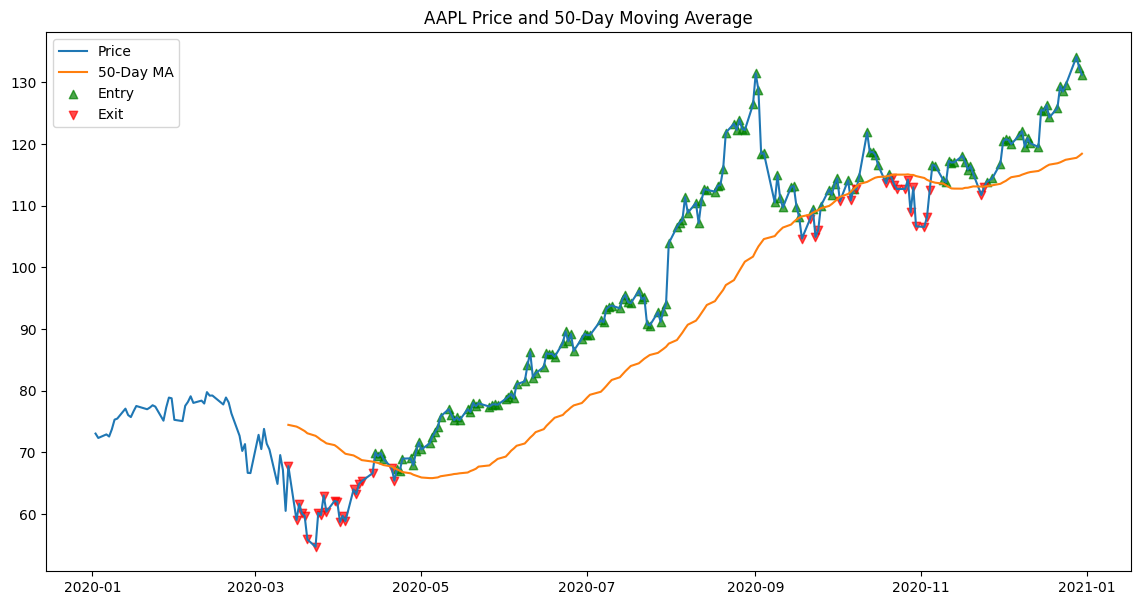

In [ ]:
import vectorbt as vbt

# Load historical price data for a symbol (e.g., AAPL)
price_data = vbt.YFData.download('AAPL', start='2020-01-01', end='2020-12-31').get('Close')

# Calculate the 50-day moving average
ma_50 = vbt.MA.run(price_data, window=50)

entries = ma_50.close_above(ma_50.ma)
exits = ma_50.close_below(ma_50.ma)


# We can directly use vectorbt to plot the price and MA. For entry and exit markers, 
# we'll need to highlight these moments manually since we're focusing on custom plotting.

import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))
plt.plot(price_data.index, price_data, label='Price')
plt.plot(price_data.index, ma_50.ma, label='50-Day MA')

# Highlight entries
plt.scatter(price_data[entries].index, price_data[entries], color='green', label='Entry', marker='^', alpha=0.7)

# Highlight exits
plt.scatter(price_data[exits].index, price_data[exits], color='red', label='Exit', marker='v', alpha=0.7)

plt.title('AAPL Price and 50-Day Moving Average')
plt.legend()
plt.show()


In [ ]:
# Backtest the strategy
portfolio = vbt.Portfolio.from_signals(price_data, entries, exits, fees=0.001, freq='1D')

# Display overall performance metrics
print(portfolio.stats())


Start                         2020-01-02 05:00:00+00:00
End                           2020-12-30 05:00:00+00:00
Period                                252 days 00:00:00
Start Value                                       100.0
End Value                                    149.978007
Total Return [%]                              49.978007
Benchmark Return [%]                          79.623588
Max Gross Exposure [%]                            100.0
Total Fees Paid                                2.527107
Max Drawdown [%]                              30.712636
Max Drawdown Duration                  83 days 00:00:00
Total Trades                                         10
Total Closed Trades                                   9
Total Open Trades                                     1
Open Trade PnL                                19.710688
Win Rate [%]                                  22.222222
Best Trade [%]                                55.227787
Worst Trade [%]                               -4